In [6]:
import hdf5storage as h5
import numpy as np
import matplotlib.pyplot as plt
import os

In [7]:
files_mat = [f for f in os.listdir('.') if f.endswith('.mat')]

0 0 ID0018C09_dataset.mat
0 1 ID0025C02_dataset.mat
0 2 ID0030C02_dataset.mat
0 3 ID0034C02_dataset.mat
0 4 ID0038C02_dataset.mat
1 0 ID0050C02_dataset.mat
1 1 ID0051C02_dataset.mat
1 2 ID0053C02_dataset.mat
1 3 ID0062C02_dataset.mat
1 4 ID0064C04_dataset.mat
2 0 ID0065C01_dataset.mat
2 1 ID0067C01_dataset.mat
2 2 ID0071C02_dataset.mat
2 3 ID0072C02_dataset.mat
2 4 ID0075C05_dataset.mat
3 0 ID0084C02_dataset.mat
3 1 ID0087C02_dataset.mat
3 2 ID0097C02_dataset.mat
3 3 ID0110C02_dataset.mat
3 4 ID0111C02_dataset.mat
4 0 ID0113C02_dataset.mat
4 1 ID0149C02_dataset.mat
4 2 ID0150C02_dataset.mat
4 3 ID0152C02_dataset.mat
4 4 ID0153C02_dataset.mat


<Figure size 10000x10000 with 0 Axes>

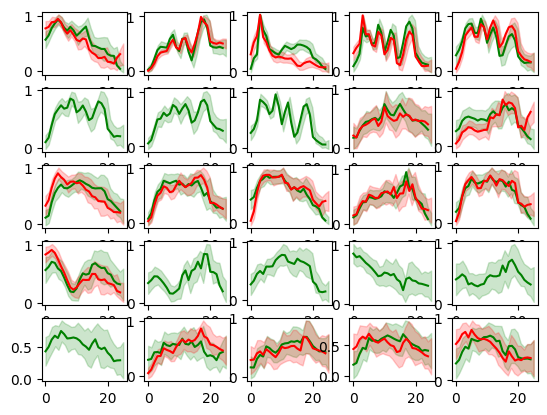

In [8]:
plt.figure(figsize=(100,100))
fig, axs = plt.subplots(5, 5)
x = np.linspace(0, 25, 25)

for i, name in enumerate(files_mat):
    file = h5.loadmat(name)
    data = file.get('data')
    labels = file.get('label')

    #normalizzazione firme spettrali
    data_normalized = np.zeros(data.shape)
    for j in range(data.shape[0]):
        massimo = np.max(data[j,:])
        minimo = np.min(data[j,:])
        data_normalized[j,:] = (data[j,:] - minimo) / (massimo - minimo)

    indices_norm = np.where(labels == 101)
    indices_tumor = np.where(labels == 200)
    indices_blood = np.where((labels == 301) | (labels == 302))
    indices_dura = np.where(labels == 320)

    pixels_norm = data_normalized[indices_norm[0],:]
    pixels_tumor = data_normalized[indices_tumor[0],:]
    pixels_blood = data_normalized[indices_blood[0],:]
    pixels_dura = data_normalized[indices_dura[0],:]

    mean_norm = np.mean(pixels_norm, axis=0)
    std_norm = np.std(pixels_norm, axis=0)
    #print("Norm std.dev: ", std_norm)

    mean_tumor = np.mean(pixels_tumor, axis=0)
    std_tumor = np.std(pixels_tumor, axis=0)
    #print("Tumor std.dev: ", std_tumor)

    mean_blood = np.mean(pixels_blood, axis=0)
    std_blood = np.std(pixels_blood, axis=0)
    #print("Blood std.dev: ", std_blood)

    mean_dura = np.mean(pixels_dura, axis=0)
    std_dura = np.std(pixels_dura, axis=0)
    #print("Dura std.dev: ", std_dura)

    axs[i//5, i%5].plot(mean_norm, label='norm', color='green')
    axs[i//5, i%5].plot(mean_tumor, label='tumor', color='red')

    axs[i//5, i%5].fill_between(x, mean_norm - std_norm, mean_norm + std_norm, color='green', alpha=0.2)
    axs[i//5, i%5].fill_between(x, mean_tumor - std_tumor, mean_tumor + std_tumor, color='red', alpha=0.2)
    print(i//5,i%5,name)

#plt.legend()
